# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [4]:
cd "C:\Users\rabid\Desktop\Graduate-Statistics-and-Data-Science-for-Sociology"

copy "https://raw.githubusercontent.com/HigherEdData/Private-Equity-and-For-Profit-Colleges-as-Agile-Predators/master/agilepredatorsdata20191116.csv" ///
agilepredatorsdata20191116.csv, replace

insheet using "agilepredatorsdata20191116.csv", comma clear

C:\Users\rabid\Desktop\Graduate-Statistics-and-Data-Science-for-Sociology
(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [5]:
ds, varwidth(29) alpha

all_under                 idx_gr                    pe_ind
all_under_w               idx_sfa                   peacqu
chain                     inst_name_new             peswitcherall
dist_black_share_w        investevent               peswitchsystemall
dist_fed_grant_pct_w      ipo                       po_ind
dist_hisp_share_w         loan_amount_borrower_c_w  poacqu
dist_pell_s               not_pe_po                 poswitcherall
dist_white_share_w        online                    poswitchsystemall
fed_grant_pct_w           owner_pe                  selective
grad_rate_150_p2yr_w      pct2yrchrtgrbkaat_w       state_n
grad_rate_150_p4yr_w      pct2yrchrtgrhispt_w       systemid
grad_rate_150_p_w         pct2yrchrtgrwhitt_w       systemnm
grtotltallgradchrt        pct4yrchrtgrbkaat_w       total_enrollment
grtotltchrt2yr            pct4yrchrtgrhispt_w       tuitionall_c_w
grtotltchrt4yr            pct4yrchrtgrwhitt_w       unitid
iclevel                   pctchrtgrbkaat_w          y

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [6]:
%help sum

<!-- END HEAD --> +----------------------------------------+ | See | For the | |-----------------+----------------------| | | | | help summarize | summarize command | | | | | help sum() | sum() function | | | | +----------------------------------------+ <!-- BEGIN FOOT -->


## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Explain narrowing choices for your own dataset here, or interpret the meaning of the for-profit college narrowing here]

In [11]:
%help drop

This front-end cannot display HTML help.

In [12]:
%help tab

"<!-- END HEAD --> Tables of frequencies See tabulate oneway for one-way tables of frequencies tabulate twoway for two-way tables of frequencies and see tabulate, summarize() for one- and two-way tables of summary statistics <!-- BEGIN FOOT -->"


In [13]:
codebook owner_pe


-------------------------------------------------------------------------------
owner_pe                                                            (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str15)

         Unique values: 6                         Missing "": 0/205,262

            Tabulation: Freq.  Value
                       41,264  "Community"
                       66,188  "Non-profit"
                        6,799  "Private equity"
                       59,220  "Privately held"
                       11,559  "Publicly traded"
                       20,232  "State"



In [15]:
tab owner_pe


       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       22.30       22.30
     Non-profit |     66,188       35.77       58.07
 Private equity |      6,799        3.67       61.75
 Privately held |     59,220       32.01       93.75
Publicly traded |     11,559        6.25      100.00
----------------+-----------------------------------
          Total |    185,030      100.00


In [14]:
drop if owner_pe=="State"

(20,232 observations deleted)


In [17]:
drop if owner_pe=="Community"

(41,264 observations deleted)


In [18]:
drop if owner_pe=="Non-profit"

(66,188 observations deleted)


In [19]:
keep if year==2014

(73,937 observations deleted)


In [24]:
sum dist_pell_s, detail


                         dist_pell_s
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%     1527.947              0
10%     2359.255              0       Obs               3,318
25%     3344.478              0       Sum of wgt.       3,318

50%     4332.054                      Mean            5125.71
                        Largest       Std. dev.      3526.453
75%     5597.208       17901.14
90%     8209.691       17901.14       Variance       1.24e+07
95%      14850.2       17901.14       Skewness        2.27957
99%     17901.14       17901.14       Kurtosis       8.685116


## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[YOUR INTERPRETATION HERE]

In [25]:
%help histogram

This front-end cannot display HTML help.

(bin=35, start=0, width=511.46116)


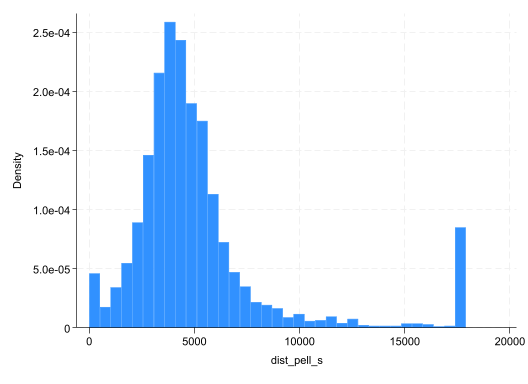

In [26]:
histogram dist_pell_s

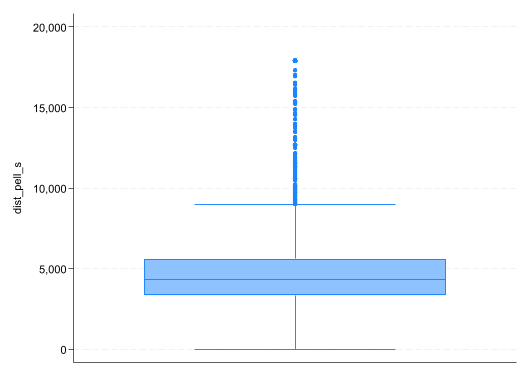

In [27]:
graph box dist_pell_s

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. [YOUR HYPOTHESIS HERE]
2. [YOUR EXPLANATION OF INDEPENDENT AND DEPENDENT VARIABLES HERE]

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [29]:
%help encode

This front-end cannot display HTML help.

In [31]:
encode iclevel, generate(iclevel2)

variable iclevel2 already defined
r(110);


In [32]:
describe iclevel


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
iclevel         str35   %35s                  


In [33]:
describe iclevel2


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   


In [35]:
encode owner_pe, generate(owner_pe2)

In [36]:
describe owner_pe2


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
owner_pe2       long    %15.0g     owner_pe2
                                              


In [38]:
tab iclevel2 owner_pe2


                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
   Four or more years |       104        191        495 |       790 
Less than 2 years (be |       232      1,364        195 |     1,791 
----------------------+---------------------------------+----------
                Total |       552      2,167        922 |     3,641 


## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

In [40]:
help graph hbar


[G-2] graph bar -- Bar charts
                   (View complete PDF manual entry)


Syntax
------

        graph bar  yvars [if] [in] [weight] [, options]

        graph hbar yvars [if] [in] [weight] [, options]


    where yvars is
                   (asis) varlist

    or is
                   (percent) [varlist] | (count) [varlist]

    or is
                   [(stat)] varname               [[(stat)] ...]
                   [(stat)] varlist               [[(stat)] ...]
                   [(stat)] [name=]varname [...]  [[(stat)] ...]

    where stat may be any of

                    mean median p1 p2 ... p99 sum count percent min max

    or
                    any of the other stats defined in [D] collapse

    yvars is optional if the option over(varname) is specified.  percent is
    the default statistic, and percentages are calculated over varname.

    mean is the default when varname or varlist is specified and stat is not
    specified.  p1 means the first percentile, p2 m

Suboptions for use with over() and yvaroptions()
------------------------------------------------

    relabel(# "text" ...) specifies text to override the default category
        labeling.  Pretend that variable sex took on two values and you typed

            . graph bar ..., ... over(sex, relabel(1 "Male" 2 "Female"))

        The result would be to relabel the first value of sex to be "Male"
        and the second value, "Female"; "Male" and "Female" would appear on
        the categorical x axis to label the bars.  This would be the result,
        regardless of whether variable sex were string or numeric and
        regardless of the codes actually stored in the variable to record
        sex.

        That is, # refers to category number, which is determined by sorting
        the unique values of the variable (here sex) and assigning 1 to the
        first value, 2 to the second, and so on.  If you are unsure as to
        what that ordering would be, the easy way to find out

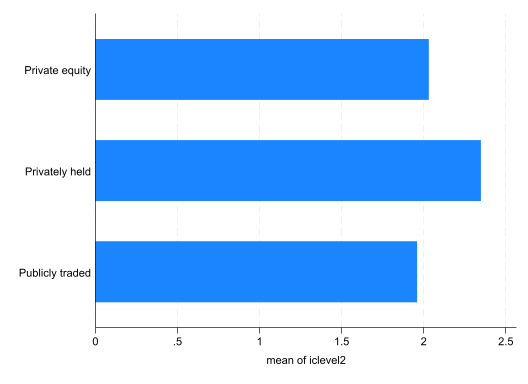

In [41]:
graph hbar iclevel2, over(owner_pe2)

In [42]:
%help xi

This front-end cannot display HTML help.

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[YOUR INTERPRETATION HERE]

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[YOUR INTERPRETATION HERE]

[record your interpretation here]

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[YOUR INTERPRETATION HERE]